In [1]:
import matplotlib
from matplotlib import font_manager, rc
font_loc = "C:/Windows/Fonts/malgunbd.ttf"
font_name = font_manager.FontProperties(fname=font_loc).get_name()
matplotlib.rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus'] = False

%matplotlib inline


In [2]:
pip install mglearn

  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582645 sha256=603fa3a4d34094c989777cc3a9ea7de9c32af00b1f78c19640a0b8f6c37b1c67
  Stored in directory: c:\users\sonjuri\appdata\local\pip\cache\wheels\87\75\37\404e66d0c4bad150f101c9a0914b11a8eccc2681559936e7f7
Successfully built mglearn
Note: you may need to restart the kernel to use updated packages.


In [3]:
import mglearn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline #주피터 노트북 안에서 그래프 보이게 하려는 명령

### knn 의 k 가 1인 경우의 알고리즘(회귀-수치형 값의 예측)

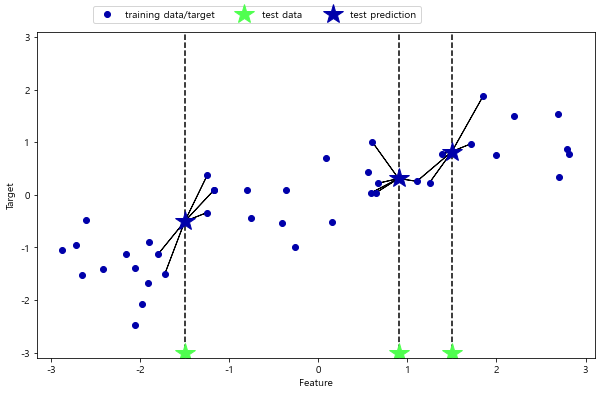

In [5]:
mglearn.plots.plot_knn_regression(n_neighbors=5)

### k=3인 경우 알고리즘(분류-범주형 값의 예측)

C:\Users\sonjuri\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


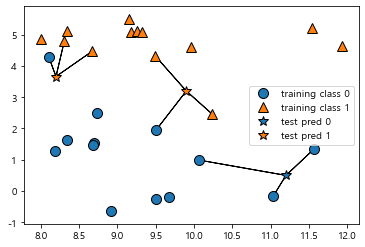

In [7]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

C:\Users\sonjuri\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


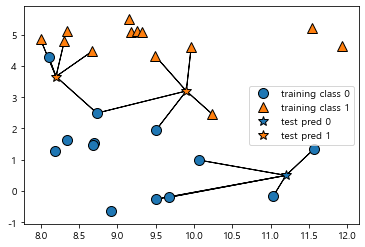

In [8]:
mglearn.plots.plot_knn_classification(n_neighbors=5)


### 하이퍼 파라미터 k에 따른 결정경계

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X,y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

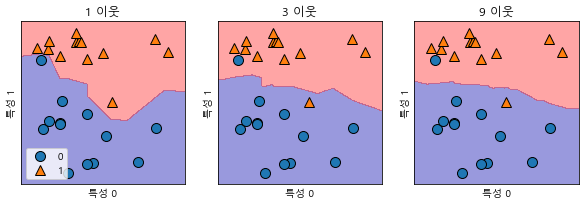

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # fit 메소드는 self 오브젝트를 리턴합니다
    # 그래서 객체 생성과 fit 메소드를 한 줄에 쓸 수 있습니다
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} 이웃".format(n_neighbors))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend(loc=3)


In [12]:
a = [1,3,4]
b = [10,20,30]

for one, two in zip(a, b): #a,b리스트를 묶어서 !
    print (one, two)

1 10
3 20
4 30


### 유방암 데이터 셋 실습

In [13]:
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

In [14]:
cancer = load_breast_cancer()
print("cancer.keys(): \n{}".format(cancer.keys()))
print("유방암 데이터의 행열 : {}".format(cancer.data.shape))

cancer.keys(): 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
유방암 데이터의 행열 : (569, 30)


In [15]:
print(cancer.data)
print(cancer.feature_names)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [16]:
from sklearn.model_selection import train_test_split

In [20]:
X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify = y, # 비율 0.75 0.25맞춰주려고
                                                   random_state=77)

In [21]:
print( len(y_train) )
y_1_all = (y == 1).sum() 
y_0_all =  (y == 0).sum() 
y_train_1 = (y_train == 1).sum()
y_train_0 = len(y_train) - (y_train == 1).sum()

y_test_1 = (y_test == 1).sum()
y_test_0 = len(y_test) - (y_test == 1).sum()

print( "y_train y_test => 1의 개수, 1의 개수", y_train_1, y_test_1 )
print( "y_train y_test => 0의 개수, 0의 개수", y_train_0, y_test_0)

## target의 확인
print( "1: y_train:{}, y_test:{}, 비율 {}, {}".format(y_train_1, y_test_1,
                                            y_train_1/y_1_all, y_test_1/y_1_all) )

print( "0 :y_train:{}, y_test:{}, 비율 {}, {}".format(y_train_0, y_test_0,
                                            y_train_0/y_0_all, y_test_0/y_0_all) )


426
y_train y_test => 1의 개수, 1의 개수 267 90
y_train y_test => 0의 개수, 0의 개수 159 53
1: y_train:267, y_test:90, 비율 0.7478991596638656, 0.25210084033613445
0 :y_train:159, y_test:53, 비율 0.75, 0.25


### 머신러닝 모델 만들기

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
X_train.shape, X_test.shape

((426, 30), (143, 30))

In [24]:
model = KNeighborsClassifier(n_neighbors = 3)
model.fit(X_train, y_train) #훈련시킨다는 이야기
pred = model.predict(X_test)
pred

array([1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1])

In [27]:
(pred == y_test).sum()/len(pred) #정확도: 합계/갯수

0.9090909090909091

### 실습 2-3
 * k 변경해가며 정확도 확인해보기
 * 8:2, 7:3, 6:4

In [45]:
X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify = y, # 비율 0.75 0.25맞춰주려고
                                                     
                                                    random_state=77)

In [39]:
test_par = [0.2, 0.3, 0.4]
k_par = [1,2,3,4,5]

for test_s in test_par:
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify = y, # 비율 0.75 0.25맞춰주려고
                                                    test_size = test_s, 
                                                    random_state=77)
    for knn_num in k_par:
        model = KNeighborsClassifier(n_neighbors=knn_num)
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        print("k: {}, 비율: {}:{}".format(knn_num, (1-test_s)*10, test_s*10))
        print("정확도: ", (pred == y_test).sum()/len(pred))

k: 1, 비율: 8.0:2.0
정확도:  0.8859649122807017
k: 2, 비율: 8.0:2.0
정확도:  0.8859649122807017
k: 3, 비율: 8.0:2.0
정확도:  0.9035087719298246
k: 4, 비율: 8.0:2.0
정확도:  0.9035087719298246
k: 5, 비율: 8.0:2.0
정확도:  0.9122807017543859
k: 1, 비율: 7.0:3.0
정확도:  0.9005847953216374
k: 2, 비율: 7.0:3.0
정확도:  0.9122807017543859
k: 3, 비율: 7.0:3.0
정확도:  0.9181286549707602
k: 4, 비율: 7.0:3.0
정확도:  0.9122807017543859
k: 5, 비율: 7.0:3.0
정확도:  0.9239766081871345
k: 1, 비율: 6.0:4.0
정확도:  0.8991228070175439
k: 2, 비율: 6.0:4.0
정확도:  0.9078947368421053
k: 3, 비율: 6.0:4.0
정확도:  0.9166666666666666
k: 4, 비율: 6.0:4.0
정확도:  0.9166666666666666
k: 5, 비율: 6.0:4.0
정확도:  0.9254385964912281


In [46]:
acc_tr = model.score(X_train, y_train)
acc_test = model.score(X_test, y_test)
acc_tr, acc_test

(0.9272300469483568, 0.9230769230769231)

In [47]:
tr_acc = []
test_acc = []
k_nums = range(1, 22, 2)# 1,3,5~21

for n in k_nums:
    # 모델 선택 및 학습 
    model = KNeighborsClassifier(n_neighbors=n)
    model.fit(X_train, y_train)
    
    # 정확도 구하기 
    acc_tr = model.score(X_train, y_train)
    acc_test = model.score(X_test, y_test)
    
    # 정확도 값 저장.
    tr_acc.append(acc_tr)
    test_acc.append(acc_test)
    
    print("k : ", n)
    print("학습용셋 정확도 {:.3f}".format(acc_tr) )
    print("테스트용셋 정확도 {:.3f}".format(acc_test) )


k :  1
학습용셋 정확도 1.000
테스트용셋 정확도 0.888
k :  3
학습용셋 정확도 0.955
테스트용셋 정확도 0.909
k :  5
학습용셋 정확도 0.953
테스트용셋 정확도 0.916
k :  7
학습용셋 정확도 0.953
테스트용셋 정확도 0.909
k :  9
학습용셋 정확도 0.946
테스트용셋 정확도 0.909
k :  11
학습용셋 정확도 0.939
테스트용셋 정확도 0.909
k :  13
학습용셋 정확도 0.937
테스트용셋 정확도 0.916
k :  15
학습용셋 정확도 0.939
테스트용셋 정확도 0.916
k :  17
학습용셋 정확도 0.934
테스트용셋 정확도 0.923
k :  19
학습용셋 정확도 0.937
테스트용셋 정확도 0.923
k :  21
학습용셋 정확도 0.934
테스트용셋 정확도 0.923


### 션형회귀 모델

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [49]:
import mglearn
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

w[0]: 0.393906  b: -0.031804


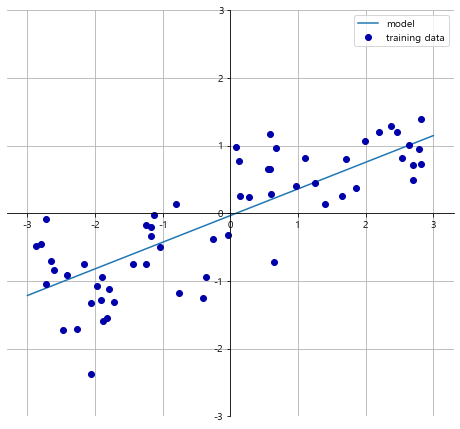

In [50]:
mglearn.plots.plot_linear_regression_wave()

In [51]:
from sklearn.datasets import load_boston

In [52]:
boston = load_boston()
X = boston.data    #입력 데이터  - 문제
y = boston.target  #출력 데이터 - 답

(array([ 21.,  55.,  82., 154.,  84.,  41.,  30.,   8.,  10.,  21.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <a list of 10 Patch objects>)

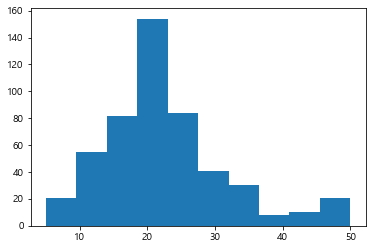

In [54]:
plt.hist(y)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = 0.3,
                                                   random_state=42)

In [57]:
print(X_train.shape)
print(boston.feature_names)

(354, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


### 모델 선택, 학습, 예측

In [58]:
model = LinearRegression()
model.fit(X_train,y_train)
pred = model.predict(X_test)
pred

array([28.64896005, 36.49501384, 15.4111932 , 25.40321303, 18.85527988,
       23.14668944, 17.3921241 , 14.07859899, 23.03692679, 20.59943345,
       24.82286159, 18.53057049, -6.86543527, 21.80172334, 19.22571177,
       26.19191985, 20.27733882,  5.61596432, 40.44887974, 17.57695918,
       27.44319095, 30.1715964 , 10.94055823, 24.02083139, 18.07693812,
       15.934748  , 23.12614028, 14.56052142, 22.33482544, 19.3257627 ,
       22.16564973, 25.19476081, 25.31372473, 18.51345025, 16.6223286 ,
       17.50268505, 30.94992991, 20.19201752, 23.90440431, 24.86975466,
       13.93767876, 31.82504715, 42.56978796, 17.62323805, 27.01963242,
       17.19006621, 13.80594006, 26.10356557, 20.31516118, 30.08649576,
       21.3124053 , 34.15739602, 15.60444981, 26.11247588, 39.31613646,
       22.99282065, 18.95764781, 33.05555669, 24.85114223, 12.91729352,
       22.68101452, 30.80336295, 31.63522027, 16.29833689, 21.07379993,
       16.57699669, 20.36362023, 26.15615896, 31.06833034, 11.98

In [60]:
model.coef_

array([-1.33470103e-01,  3.58089136e-02,  4.95226452e-02,  3.11983512e+00,
       -1.54170609e+01,  4.05719923e+00, -1.08208352e-02, -1.38599824e+00,
        2.42727340e-01, -8.70223437e-03, -9.10685208e-01,  1.17941159e-02,
       -5.47113313e-01])

In [61]:
model.intercept_

31.631084035694585

In [62]:
import pandas as pd

In [65]:
dict_dat = {"실제값":y_test, "예측값":pred, "오차":y_test - pred}
dat = pd.DataFrame(dict_dat )
dat


,실제값,예측값,오차
0,23.6,28.648960,-5.048960
1,32.4,36.495014,-4.095014
2,13.6,15.411193,-1.811193
3,22.8,25.403213,-2.603213
4,16.1,18.855280,-2.755280
...,...,...,...
147,17.1,17.403672,-0.303672
148,14.5,13.385941,1.114059
149,50.0,39.983425,10.016575
150,14.3,16.682863,-2.382863


In [67]:
dat['오차절대값'] = abs(dat['오차'])

### 라쏘 회귀, 릿지 회귀 (L1, L2)

In [69]:
import mglearn
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso
import pandas as pd

In [70]:
### 데이터 셋 준비 
boston = load_boston()  # 데이터 셋 불러오기
print(type(boston.target), type(boston.data))
print(boston.target.shape, boston.data.shape)

df_boston = pd.DataFrame(boston.data,columns=boston.feature_names)
df_boston['target'] = pd.Series(boston.target)
df_boston.head()


<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(506,) (506, 13)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [73]:
X = df_boston.loc[ : , 'CRIM':'LSTAT'] # 입력 데이터
y = boston.target                      # 출력 데이터

print("정규화, 확장 전 데이터 셋 : ", X.shape, y.shape)

정규화, 확장 전 데이터 셋 :  (506, 13) (506,)


### 정규화 0~1

In [75]:
nor_X = MinMaxScaler().fit_transform(X)
nor_X

array([[0.00000000e+00, 1.80000000e-01, 6.78152493e-02, ...,
        2.87234043e-01, 1.00000000e+00, 8.96799117e-02],
       [2.35922539e-04, 0.00000000e+00, 2.42302053e-01, ...,
        5.53191489e-01, 1.00000000e+00, 2.04470199e-01],
       [2.35697744e-04, 0.00000000e+00, 2.42302053e-01, ...,
        5.53191489e-01, 9.89737254e-01, 6.34657837e-02],
       ...,
       [6.11892474e-04, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 1.00000000e+00, 1.07891832e-01],
       [1.16072990e-03, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 9.91300620e-01, 1.31070640e-01],
       [4.61841693e-04, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 1.00000000e+00, 1.69701987e-01]])

### 13개 변수를 104개 변수틀 만들기

In [76]:
ex_X = PolynomialFeatures(degree=2, include_bias=False).fit_transform(nor_X)
ex_X.shape

(506, 104)

In [77]:
from sklearn.linear_model import LinearRegression

In [82]:
X_train, X_test, y_train, y_test = train_test_split(ex_X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.9448313975211594
0.7758378393351691


In [83]:
ridge = Ridge().fit(X_train, y_train)
print(ridge)
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

Ridge()
0.8700969775259919
0.8145421818415556


In [85]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print(ridge10)
print("훈련 세트 점수 : {:.2f}".format(ridge10.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(ridge10.score(X_test, y_test)))
###
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print(ridge01)
print("훈련 세트 점수 : {:.2f}".format(ridge01.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(ridge01.score(X_test, y_test)))
ridge001 = Ridge(alpha=0.01).fit(X_train, y_train)
ridge_p = [10, 5, 1, 0.1, 0.01]

for i in ridge_p:
    ridge = Ridge(alpha=i).fit(X_train, y_train)
    
    print("alpha : {}".format(i))
    print("훈련 데이터 세트 점수 : {:.2f}".format(ridge.score(X_train, y_train)))
    print("테스트 데이터 세트 점수 : {:.2f}".format(ridge.score(X_test, y_test)))


Ridge(alpha=10)
훈련 세트 점수 : 0.77
테스트 세트 점수 : 0.73
Ridge(alpha=0.1)
훈련 세트 점수 : 0.92
테스트 세트 점수 : 0.82
alpha : 10
훈련 데이터 세트 점수 : 0.77
테스트 데이터 세트 점수 : 0.73
alpha : 5
훈련 데이터 세트 점수 : 0.80
테스트 데이터 세트 점수 : 0.76
alpha : 1
훈련 데이터 세트 점수 : 0.87
테스트 데이터 세트 점수 : 0.81
alpha : 0.1
훈련 데이터 세트 점수 : 0.92
테스트 데이터 세트 점수 : 0.82
alpha : 0.01
훈련 데이터 세트 점수 : 0.94
테스트 데이터 세트 점수 : 0.81


In [90]:
lr = LinearRegression().fit(X_train, y_train)
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
ridge1 = Ridge(alpha=1).fit(X_train, y_train)
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
ridge001 = Ridge(alpha=0.01).fit(X_train, y_train)
ridge0001 = Ridge(alpha=0.001).fit(X_train, y_train)


Text(0.5, 1.0, 'Ridge alpha = 1')

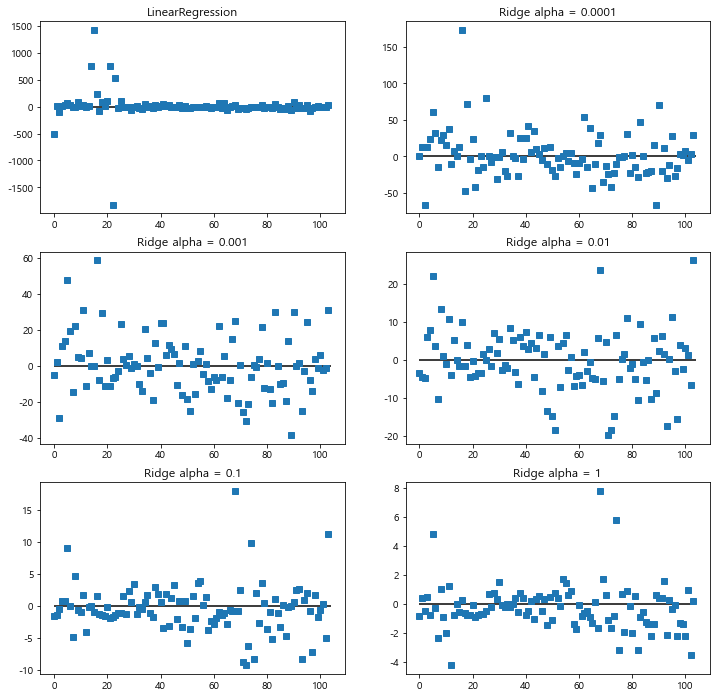

In [91]:
fig  = plt.figure(figsize = (12,12))

plt.subplot(3, 2, 1)
plt.hlines(0,0, len(lr.coef_))
plt.plot(lr.coef_, 's', label = "LinearRegression")
plt.title("LinearRegression")

plt.subplot(3,2,2)
plt.hlines(0,0, len(ridge0001.coef_))
plt.plot(ridge0001.coef_, 's', label = "Ridge alpha = 0.0001")
plt.title("Ridge alpha = 0.0001")

plt.subplot(3,2,3)
plt.hlines(0,0, len(ridge001.coef_))
plt.plot(ridge001.coef_, 's', label = "Ridge alpha = 0.001")
plt.title("Ridge alpha = 0.001")

plt.subplot(3,2,4)
plt.hlines(0,0, len(ridge01.coef_))
plt.plot(ridge01.coef_, 's', label = "Ridge alpha = 0.01")
plt.title("Ridge alpha = 0.01")

plt.subplot(3,2,5)
plt.hlines(0,0, len(ridge1.coef_))
plt.plot(ridge1.coef_, 's', label = "Ridge alpha = 0.1")
plt.title("Ridge alpha = 0.1")

plt.subplot(3,2,6)
plt.hlines(0,0, len(ridge10.coef_))
plt.plot(ridge10.coef_, 's', label = "Ridge alpha = 1")
plt.title("Ridge alpha = 1")